# Author: Faolán Hamilton
## Project Description: Analyse the planning applications submitted to Clare County Council over the past year

### Strategy
- Filter the dataset to only Clare County Council (>500,000 records down to 11,000)
- Filter the dataset to only the past year (2025 inclusive ~ 1,000)
- Filter out unnecessary headings 

### Clean-up
- Eircode out of address using regex
- Can I use commas  to determine a townland for address and group by settlement?

### Potential Questions:
- How many of the planning applications are granted?
- Determine a type for each (Residential, commercial etc.)
- Number of residential units 

In [37]:
# Modules to import 

import datetime as dt

from datetime import datetime, timedelta

# I had to pip install pandas
import pandas as pd

# I had to pip install matplotlib
import matplotlib.pyplot as plt

# regex
import re

### Step 1: I went to the Irish Planning Applications Geohive website (https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?filters=eyJQbGFubmluZ0F1dGhvcml0eSI6WyJDbGFyZSBDb3VudHkgQ291bmNpbCJdLCJSZWNlaXZlZERhdGUiOlsxNzM1Njg5NjAwMDAwLDI3MDQyMzM2MDAwMDBdfQ%3D%3D&layer=0&showTable=true) and filtered the +500,000 results to only show Clare County Council applications since 1/1/2025.

#### Note - I repeated this step in the New Year to get a list from all of 2025

### Step 2: I downloaded the results as a .csv and .shp from the webiste. The .csv file has been used throughout the project as the backbone data while the shapefile was used for generating supporting graphic maps. 

### Step 3 - I uploaded the file to this project folder

---------------------------------

##### Cleaning-up the data
- Remove headers
- Separate address and postcode
- Format datetime

In [2]:
df = pd.read_csv("ClareCoCo_PlanningApps_2025.csv")

In [3]:
headers = df.columns.tolist()
headers

['OBJECTID',
 'Planning Authority',
 'Application Number',
 'Development Description',
 'Development Address',
 'Development Postcode',
 'ITMEasting',
 'ITMNorthing',
 'Application Status',
 'Application Type',
 'Applicant Forename',
 'Applicant Surname',
 'Applicant Address',
 'Decision',
 'Land Use Code',
 'AreaofSite',
 'NumResidentialUnits',
 'One-Off House',
 'FloorArea',
 'ReceivedDate',
 'WithdrawnDate',
 'DecisionDate',
 'DecisionDueDate',
 'GrantDate',
 'ExpiryDate',
 'Appeal Reference Number',
 'Appeal Status',
 'Appeal Decision',
 'AppealDecisionDate',
 'AppealSubmittedDate',
 'FIRequestDate',
 'FIRecDate',
 'Link Application Details',
 'One-Off KPI',
 'ETL_DATE',
 'Site Id',
 'ORIG_FID',
 'x',
 'y']

In [4]:
#remove the headers that are not relevant
drop_col_list = ['OBJECTID','Planning Authority','ITMEasting','ITMNorthing','Applicant Forename','Applicant Surname','Applicant Address','WithdrawnDate','GrantDate','ExpiryDate','Appeal Reference Number','AppealSubmittedDate','FIRequestDate','FIRecDate', 'Appeal Status', 'Site Id', 'ETL_DATE', 'ORIG_FID', 'One-Off KPI']
df.drop(columns=drop_col_list, inplace=True)
df.head(1)

,Application Number,Development Description,Development Address,Development Postcode,Application Status,Application Type,Decision,Land Use Code,AreaofSite,NumResidentialUnits,One-Off House,FloorArea,ReceivedDate,DecisionDate,DecisionDueDate,Appeal Decision,AppealDecisionDate,Link Application Details,x,y
0,2552,"to construct dwelling house, shared entrance, ...","Drumullan , Kilmurry , Sixmilebridge Co Clare",NaN,APPLICATION FINALISED,PERMISSION,CONDITIONAL,NaN,NaN,1,Y,138.12,2/27/2025 12:00:00 AM,7/8/2025 12:00:00 AM,7/8/2025 12:00:00 AM,NaN,NaN,http://www.eplanning.ie/ClareCC/AppFileRefDeta...,-979920.603746,6.943238e+06


#### Address and Postcode format

In [5]:
df['Development Address'] = df['Development Address'].astype(str)

In [6]:
df['Development Address'] = df['Development Address'].str.strip()
print(df['Development Address'])

0           Drumullan , Kilmurry , Sixmilebridge Co Clare
1                Derrycon Upper , Mountshannon , Co Clare
2                              Corbally , Quin , Co Clare
3                      Clonreddan , Cooraclare , Co Clare
4       Unit 5 Clare Road Mall , Clare Road Ennis , Co...
                              ...                        
1168      Bay View , Moyasta , Kilrush Co. Clare V15 W181
1169            Demesne  , Kilkishen , Co. Clare V95 DV56
1170                    Ballynacragga , Kildysart , Ennis
1171                        Ballinagun , Cree , Co. Clare
1172              Calluragh East , Ennistymon , Co. Clare
Name: Development Address, Length: 1173, dtype: object


In [7]:
# Source: https://app.studyraid.com/en/read/14383/490004/standardizing-text-data-in-pandas
postcode_fix = df['Development Address'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
postcode_fix

0         DrumullanKilmurrySixmilebridgeCoClare
1              DerryconUpperMountshannonCoClare
2                           CorballyQuinCoClare
3                   ClonreddanCooraclareCoClare
4       Unit5ClareRoadMallClareRoadEnnisCoClare
                         ...                   
1168        BayViewMoyastaKilrushCoClareV15W181
1169             DemesneKilkishenCoClareV95DV56
1170                BallynacraggaKildysartEnnis
1171                      BallinagunCreeCoClare
1172             CalluraghEastEnnistymonCoClare
Name: Development Address, Length: 1173, dtype: object

In [8]:
# Take anything after Co.Clare
df['Development Postcode']= postcode_fix.str.split('CoClare').str[1]
df['Development Postcode']

0              
1              
2              
3              
4              
         ...   
1168    V15W181
1169    V95DV56
1170        NaN
1171           
1172           
Name: Development Postcode, Length: 1173, dtype: object

In [9]:
# Take anything before Co.Clare
address_fix = postcode_fix.str.split('CoClare').str[0]
address_fix

0         DrumullanKilmurrySixmilebridge
1              DerryconUpperMountshannon
2                           CorballyQuin
3                   ClonreddanCooraclare
4       Unit5ClareRoadMallClareRoadEnnis
                      ...               
1168               BayViewMoyastaKilrush
1169                    DemesneKilkishen
1170         BallynacraggaKildysartEnnis
1171                      BallinagunCree
1172             CalluraghEastEnnistymon
Name: Development Address, Length: 1173, dtype: object

In [10]:
#https://www.geeksforgeeks.org/python/python-add-space-between-potential-words/
# using regex() to perform task 
df['Development Address'] = [re.sub(r"(\w)([A-Z])", r"\1 \2", x) for x in address_fix]
df['Development Address']

0             Drumullan Kilmurry Sixmilebridge
1                  Derrycon Upper Mountshannon
2                                Corbally Quin
3                        Clonreddan Cooraclare
4       Unit5 Clare Road Mall Clare Road Ennis
                         ...                  
1168                  Bay View Moyasta Kilrush
1169                         Demesne Kilkishen
1170             Ballynacragga Kildysart Ennis
1171                           Ballinagun Cree
1172                 Calluragh East Ennistymon
Name: Development Address, Length: 1173, dtype: object

#### Format datetime

In [11]:
#https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#https://sqlpey.com/python/solved-how-to-change-the-datetime-format-in-pandas/
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df['ReceivedDate'].dt.strftime('%d/%m/%Y')

/tmp/ipykernel_162782/3783734388.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])


0       27/02/2025
1       28/02/2025
2       24/02/2025
3       26/02/2025
4       27/02/2025
           ...    
1168    18/12/2025
1169    18/12/2025
1170    18/12/2025
1171    18/12/2025
1172    18/12/2025
Name: ReceivedDate, Length: 1173, dtype: object

In [12]:
df['DecisionDate'] = pd.to_datetime(df['DecisionDate'])
df['DecisionDate'].dt.strftime('%d/%m/%Y')

/tmp/ipykernel_162782/1014765470.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DecisionDate'] = pd.to_datetime(df['DecisionDate'])


0       08/07/2025
1       22/04/2025
2       16/04/2025
3       22/04/2025
4       22/04/2025
           ...    
1168           NaN
1169           NaN
1170           NaN
1171           NaN
1172           NaN
Name: DecisionDate, Length: 1173, dtype: object

In [13]:
df['DecisionDueDate'] = pd.to_datetime(df['DecisionDueDate'])
df['DecisionDueDate'].dt.strftime('%d/%m/%Y')

/tmp/ipykernel_162782/3264646466.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DecisionDueDate'] = pd.to_datetime(df['DecisionDueDate'])


0       08/07/2025
1       24/04/2025
2       20/04/2025
3       22/04/2025
4       23/04/2025
           ...    
1168    20/02/2026
1169    20/02/2026
1170    20/02/2026
1171    20/02/2026
1172    20/02/2026
Name: DecisionDueDate, Length: 1173, dtype: object

In [14]:
df['DecisionDueDate'].dtype

dtype('<M8[ns]')

----------------------------

### I want to get all unique values in the 'Application Type' column, as I know from my urban planning degree that not all applications are larger scale building development/even new applications

In [15]:
# I want to determine the count of the unique values in the 'Application Types' column.
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

application_types = df['Application Type'].value_counts()
print("Value counts in Application Type:\n",application_types);

Value counts in Application Type:
 Application Type
PERMISSION               921
RETENTION                192
OUTLINE PERMISSION        30
PERMISSION CONSEQUENT     17
EXTENSION OF DURATION     13
Name: count, dtype: int64


### I tried to as the CoPilot to define all five categories, but found they were giving me dud sources and not reliable ones. Instead I used two sources from Clare County Council to define the five categories above in layman's terms

##### Here is the Co-Pilot conversation that lead me to go a different direction (manually looking at Clare County Council's website) https://copilot.microsoft.com/shares/yEspVqnVx13PxU259G9ku

Source for extension of duration: https://www.clarecoco.ie/services/planning/applications/permission-durations/

Source: https://mylittlehome.ie/clare-county-council-planning-permission-faqs/#What_Are_the_Main_Types_of_Planning_Permission:~:text=The%20Irish%20Times-,What%20Are%20the%20Main%20Types%20of%20Planning%20Permission%3F,-Full%20Permission%0AThe

Types of Planning Applications:
- Permission - The standard application for building a new dwelling, extension, or major alteration which is valid for five years

- Retention Permission - Required where works have already been carried out without prior approval.

- Outline Permission - Used to establish whether a proposal is acceptable in principle before submitting detailed plans. If granted, a subsequent full application must follow within 3 years.

- Permission Consequent to Outline - The full application that follows the initial outline permission above.

- Extension of Duration - Extend the appropriate period of a planning permission. In certain circumstances, the planning authority may extend the life of a planning permission. 

--------------------------------------------

## Planning Application Type

In [16]:
# I also need to determine the outcome of the applications that have decisions 
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

planning_app= df['Application Type'].value_counts()
print("Value counts in Application Type:\n",planning_app);

Value counts in Application Type:
 Application Type
PERMISSION               921
RETENTION                192
OUTLINE PERMISSION        30
PERMISSION CONSEQUENT     17
EXTENSION OF DURATION     13
Name: count, dtype: int64


In [17]:
planning_app_types = planning_app.index
planning_app_types

Index(['PERMISSION', 'RETENTION', 'OUTLINE PERMISSION',
       'PERMISSION CONSEQUENT', 'EXTENSION OF DURATION'],
      dtype='object', name='Application Type')

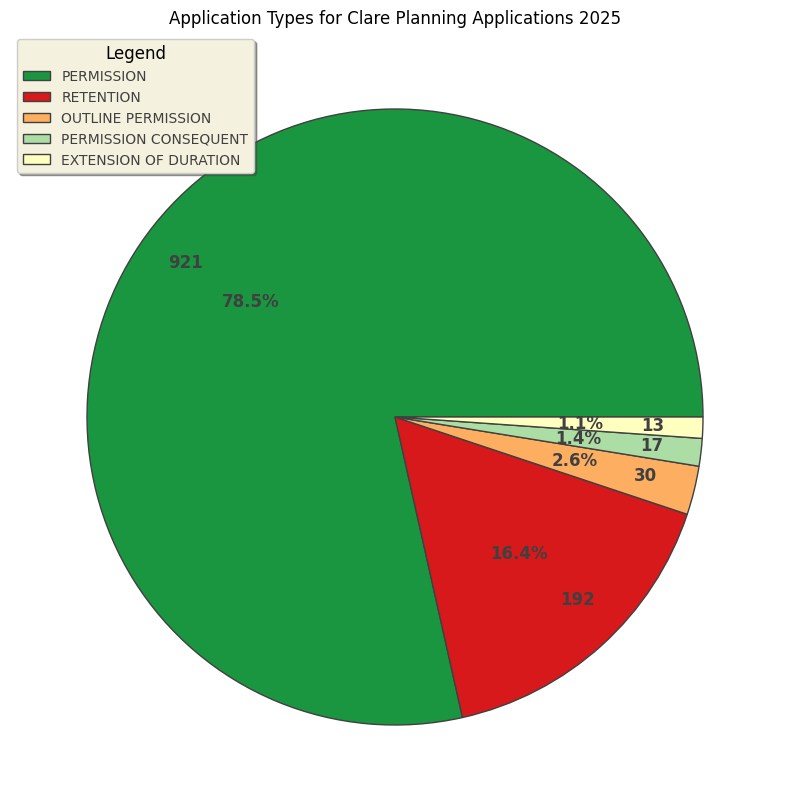

In [18]:
# Source - https://www.geeksforgeeks.org/data-science/plot-a-pie-chart-in-python-using-matplotlib/
# Source -  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure (figsize = (10,10))

# The below source was incredibly useful to help me to figure out plot label sizing
# Source - https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart

# Source for label positioning - https://proclusacademy.com/blog/customize_matplotlib_piechart/
# Source for edgecolour - https://colab.research.google.com/github/Vikasdonta1/Data-Visualization-using-Matplotlib-Course/blob/main/Matplotlib_Plot_a_Pie_Chart.ipynb#scrollTo=4pKiYTKx6bgP

plt.pie(planning_app, labels = planning_app, labeldistance = 0.8, wedgeprops={'edgecolor': '#404040'}, textprops={'fontsize': 12, 'color' : '#404040', 'weight':'bold'}, autopct='%1.1f%%', pctdistance = 0.6, colors =['#1a9641', '#d7191c','#fdae61', '#abdda4', '#ffffbf'])

plt.title("Application Types for Clare Planning Applications 2025")

# Source - https://matplotlib.org/stable/api/legend_api.html
legend = plt.legend(planning_app_types, labelcolor = "#404040", shadow = True, loc = "upper left", title = 'Legend', facecolor='#f4f1de', fontsize = 'medium', title_fontsize = 'large')
# Source - https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html
legend.get_title().set_color("#000000")

plt.show()

A map showing the Planning Applications Types

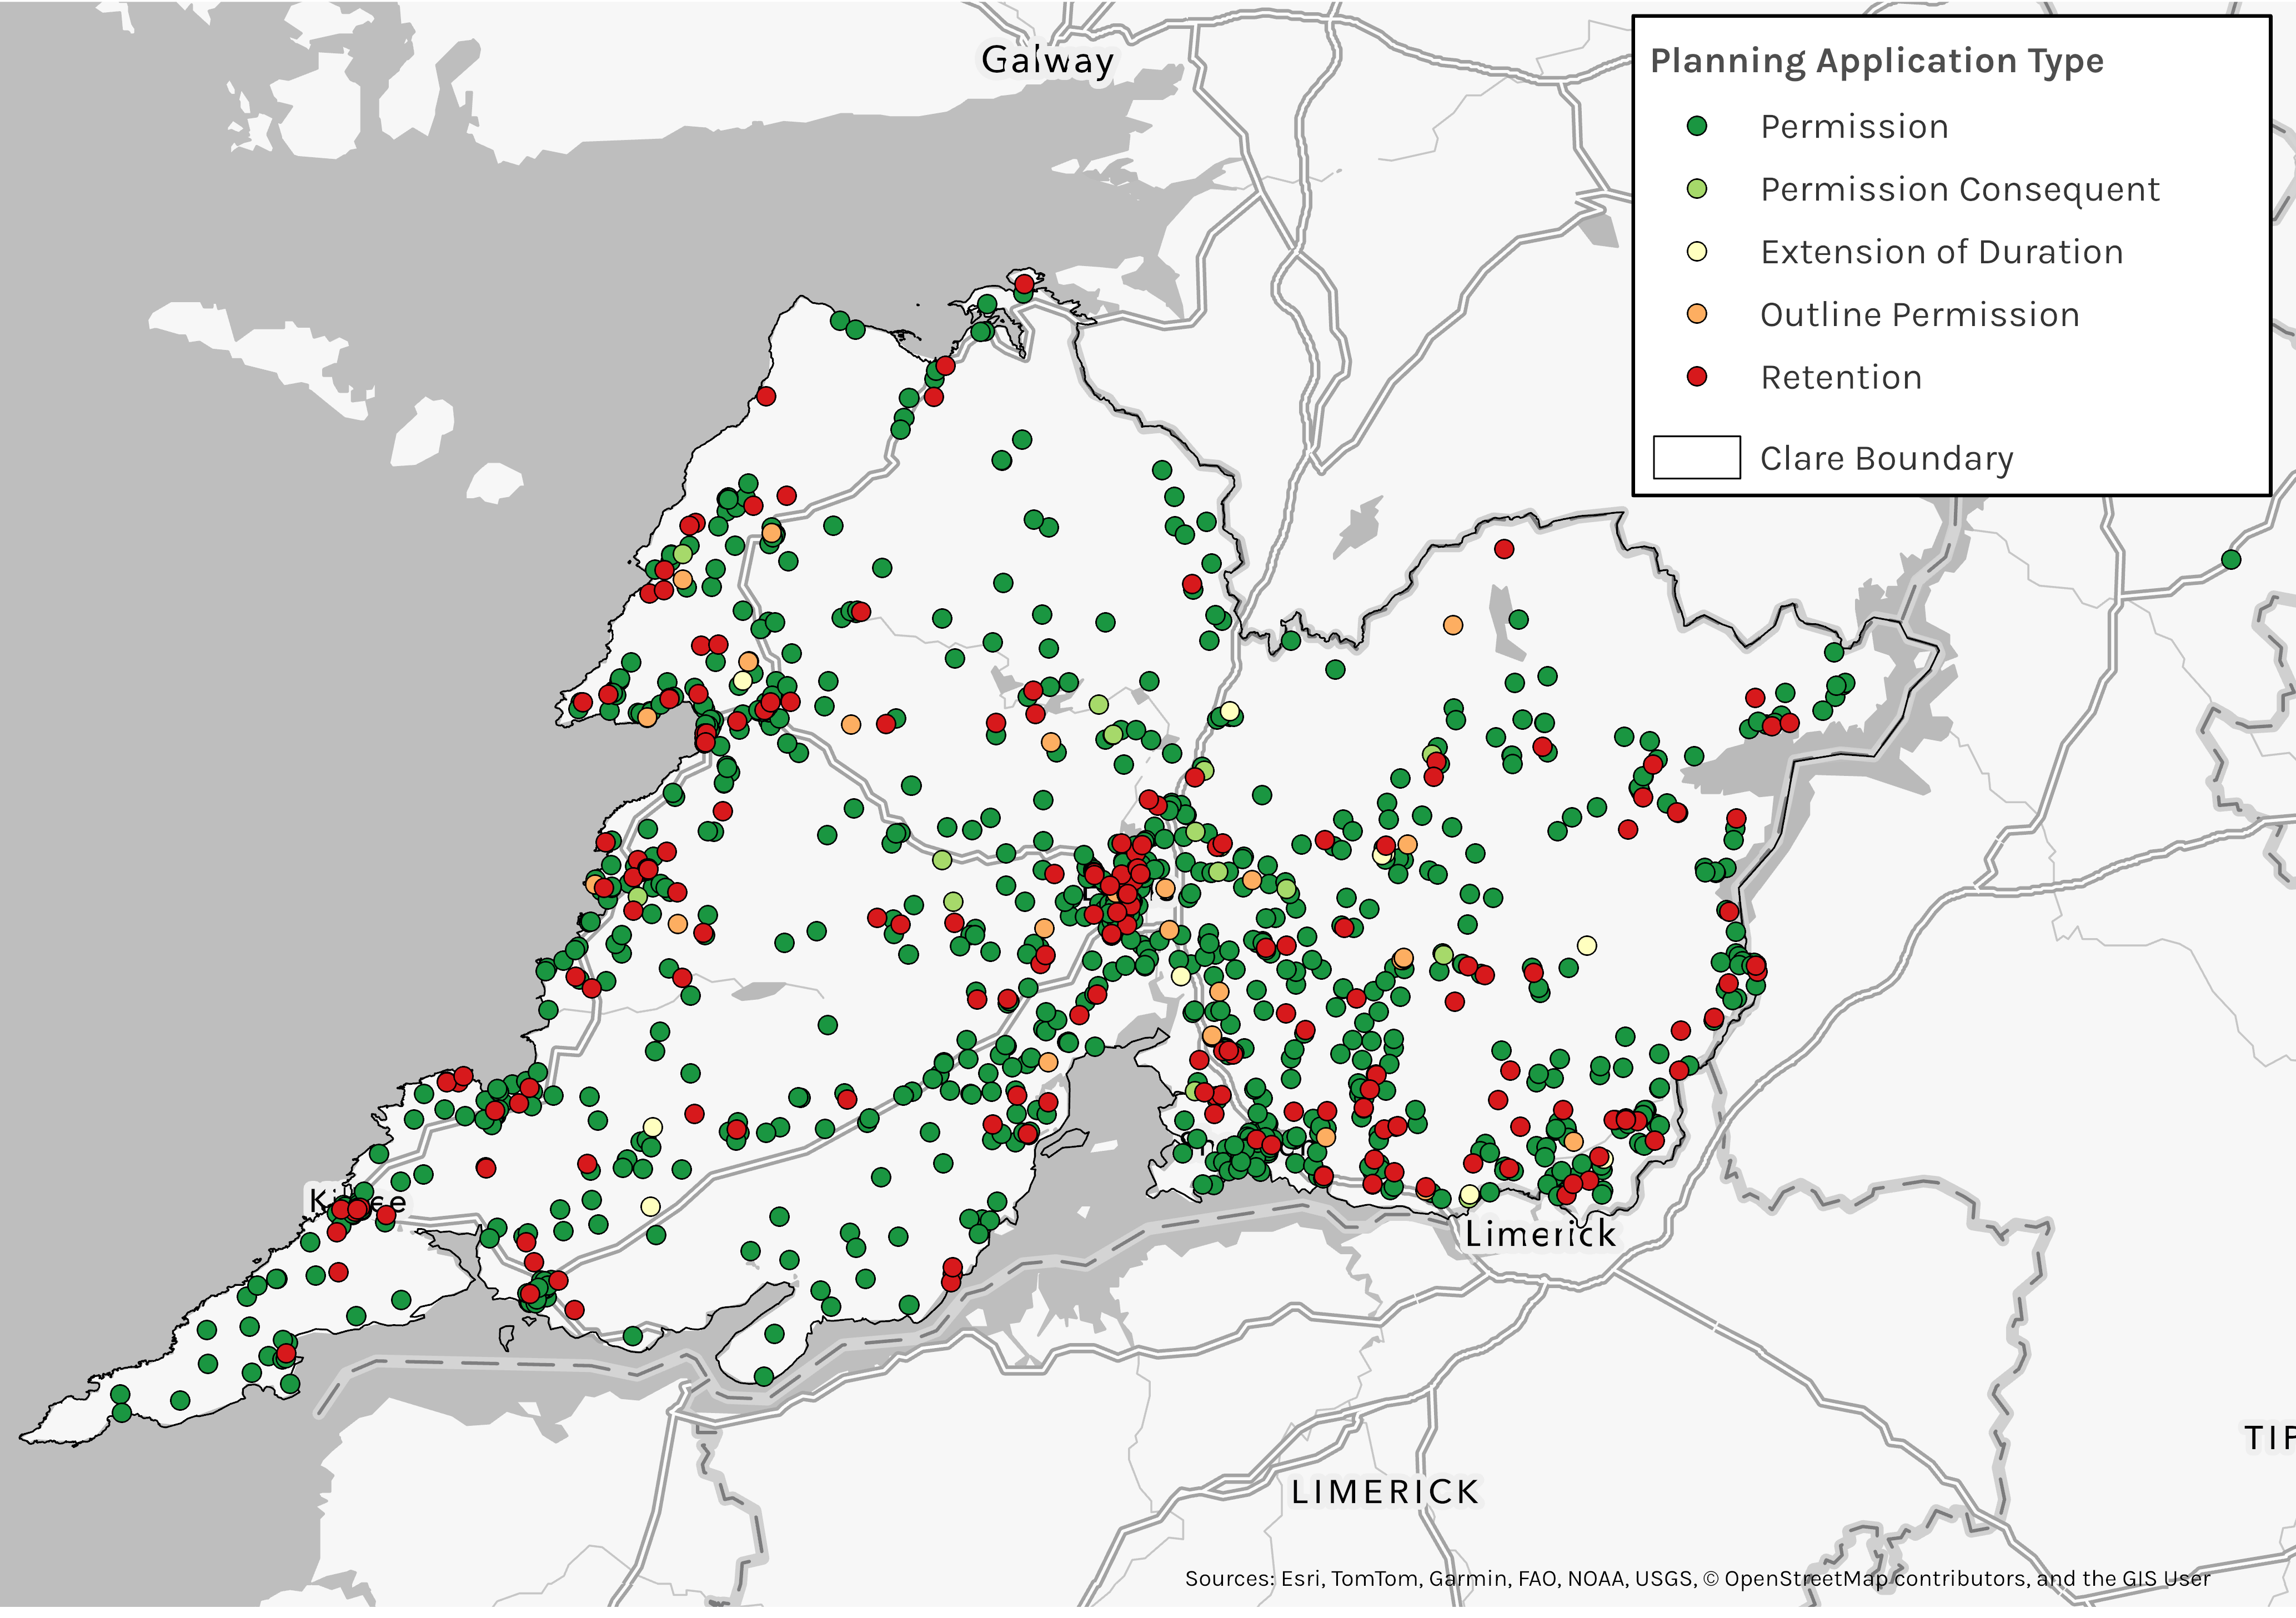

-----------------------------------

## Decision Status

In [19]:
# Fill NaN value with 'NOT YET DECIDED'
df['Decision'] = df['Decision'].fillna('NOT YET DECIDED')

In [20]:
# I also need to determine the outcome of the applications that have decisions 
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

decision = df['Decision'].value_counts()
print("Value counts in Decisions:\n",decision);

Value counts in Decisions:
 Decision
CONDITIONAL        709
NOT YET DECIDED    399
REFUSED             52
UNCONDITIONAL       13
Name: count, dtype: int64


In [21]:
decision_types = decision.index
decision_types

Index(['CONDITIONAL', 'NOT YET DECIDED', 'REFUSED', 'UNCONDITIONAL'], dtype='object', name='Decision')

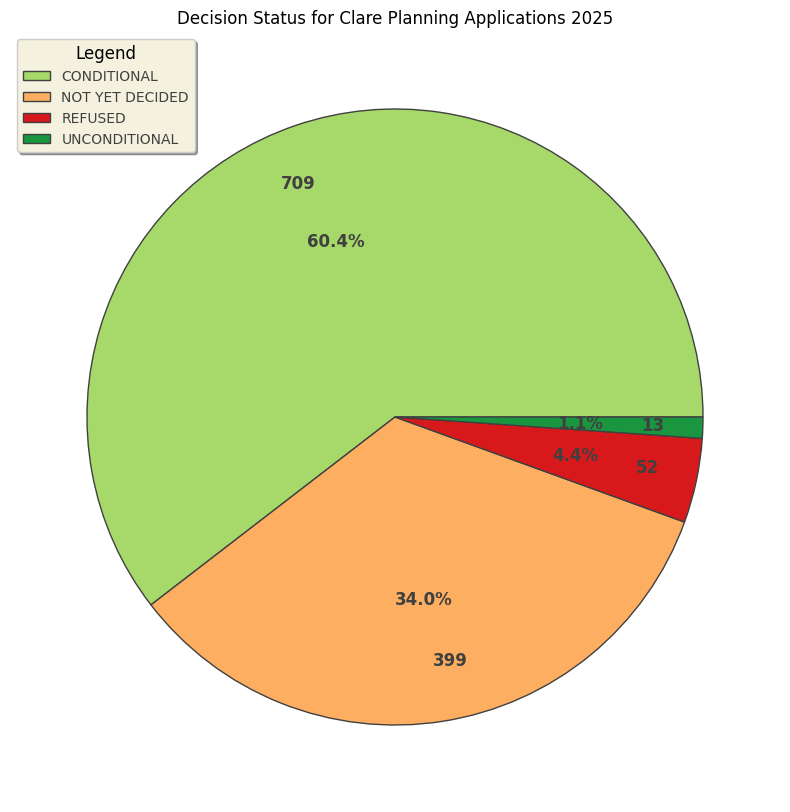

In [22]:
# Source - https://www.geeksforgeeks.org/data-science/plot-a-pie-chart-in-python-using-matplotlib/
# Source -  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure (figsize = (10,10))

# The below source was incredibly useful to help me to figure out plot label sizing
# Source - https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart

# Source for label positioning - https://proclusacademy.com/blog/customize_matplotlib_piechart/
# Source for edgecolour - https://colab.research.google.com/github/Vikasdonta1/Data-Visualization-using-Matplotlib-Course/blob/main/Matplotlib_Plot_a_Pie_Chart.ipynb#scrollTo=4pKiYTKx6bgP

plt.pie(decision, labels = decision, labeldistance = 0.8, wedgeprops={'edgecolor': '#404040'}, textprops={'fontsize': 12, 'color' : '#404040', 'weight':'bold'}, autopct='%1.1f%%', pctdistance = 0.6, colors =['#a6d96a', '#fdae61','#d7191c', '#1a9641'])

plt.title("Decision Status for Clare Planning Applications 2025")

# Source - https://matplotlib.org/stable/api/legend_api.html
legend = plt.legend(decision_types, labelcolor = "#404040", shadow = True, loc = "upper left", title = 'Legend', facecolor='#f4f1de', fontsize = 'medium', title_fontsize = 'large')
# Source - https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html
legend.get_title().set_color("#000000")

plt.show()

A map showing the Decision Status of Planning Applications

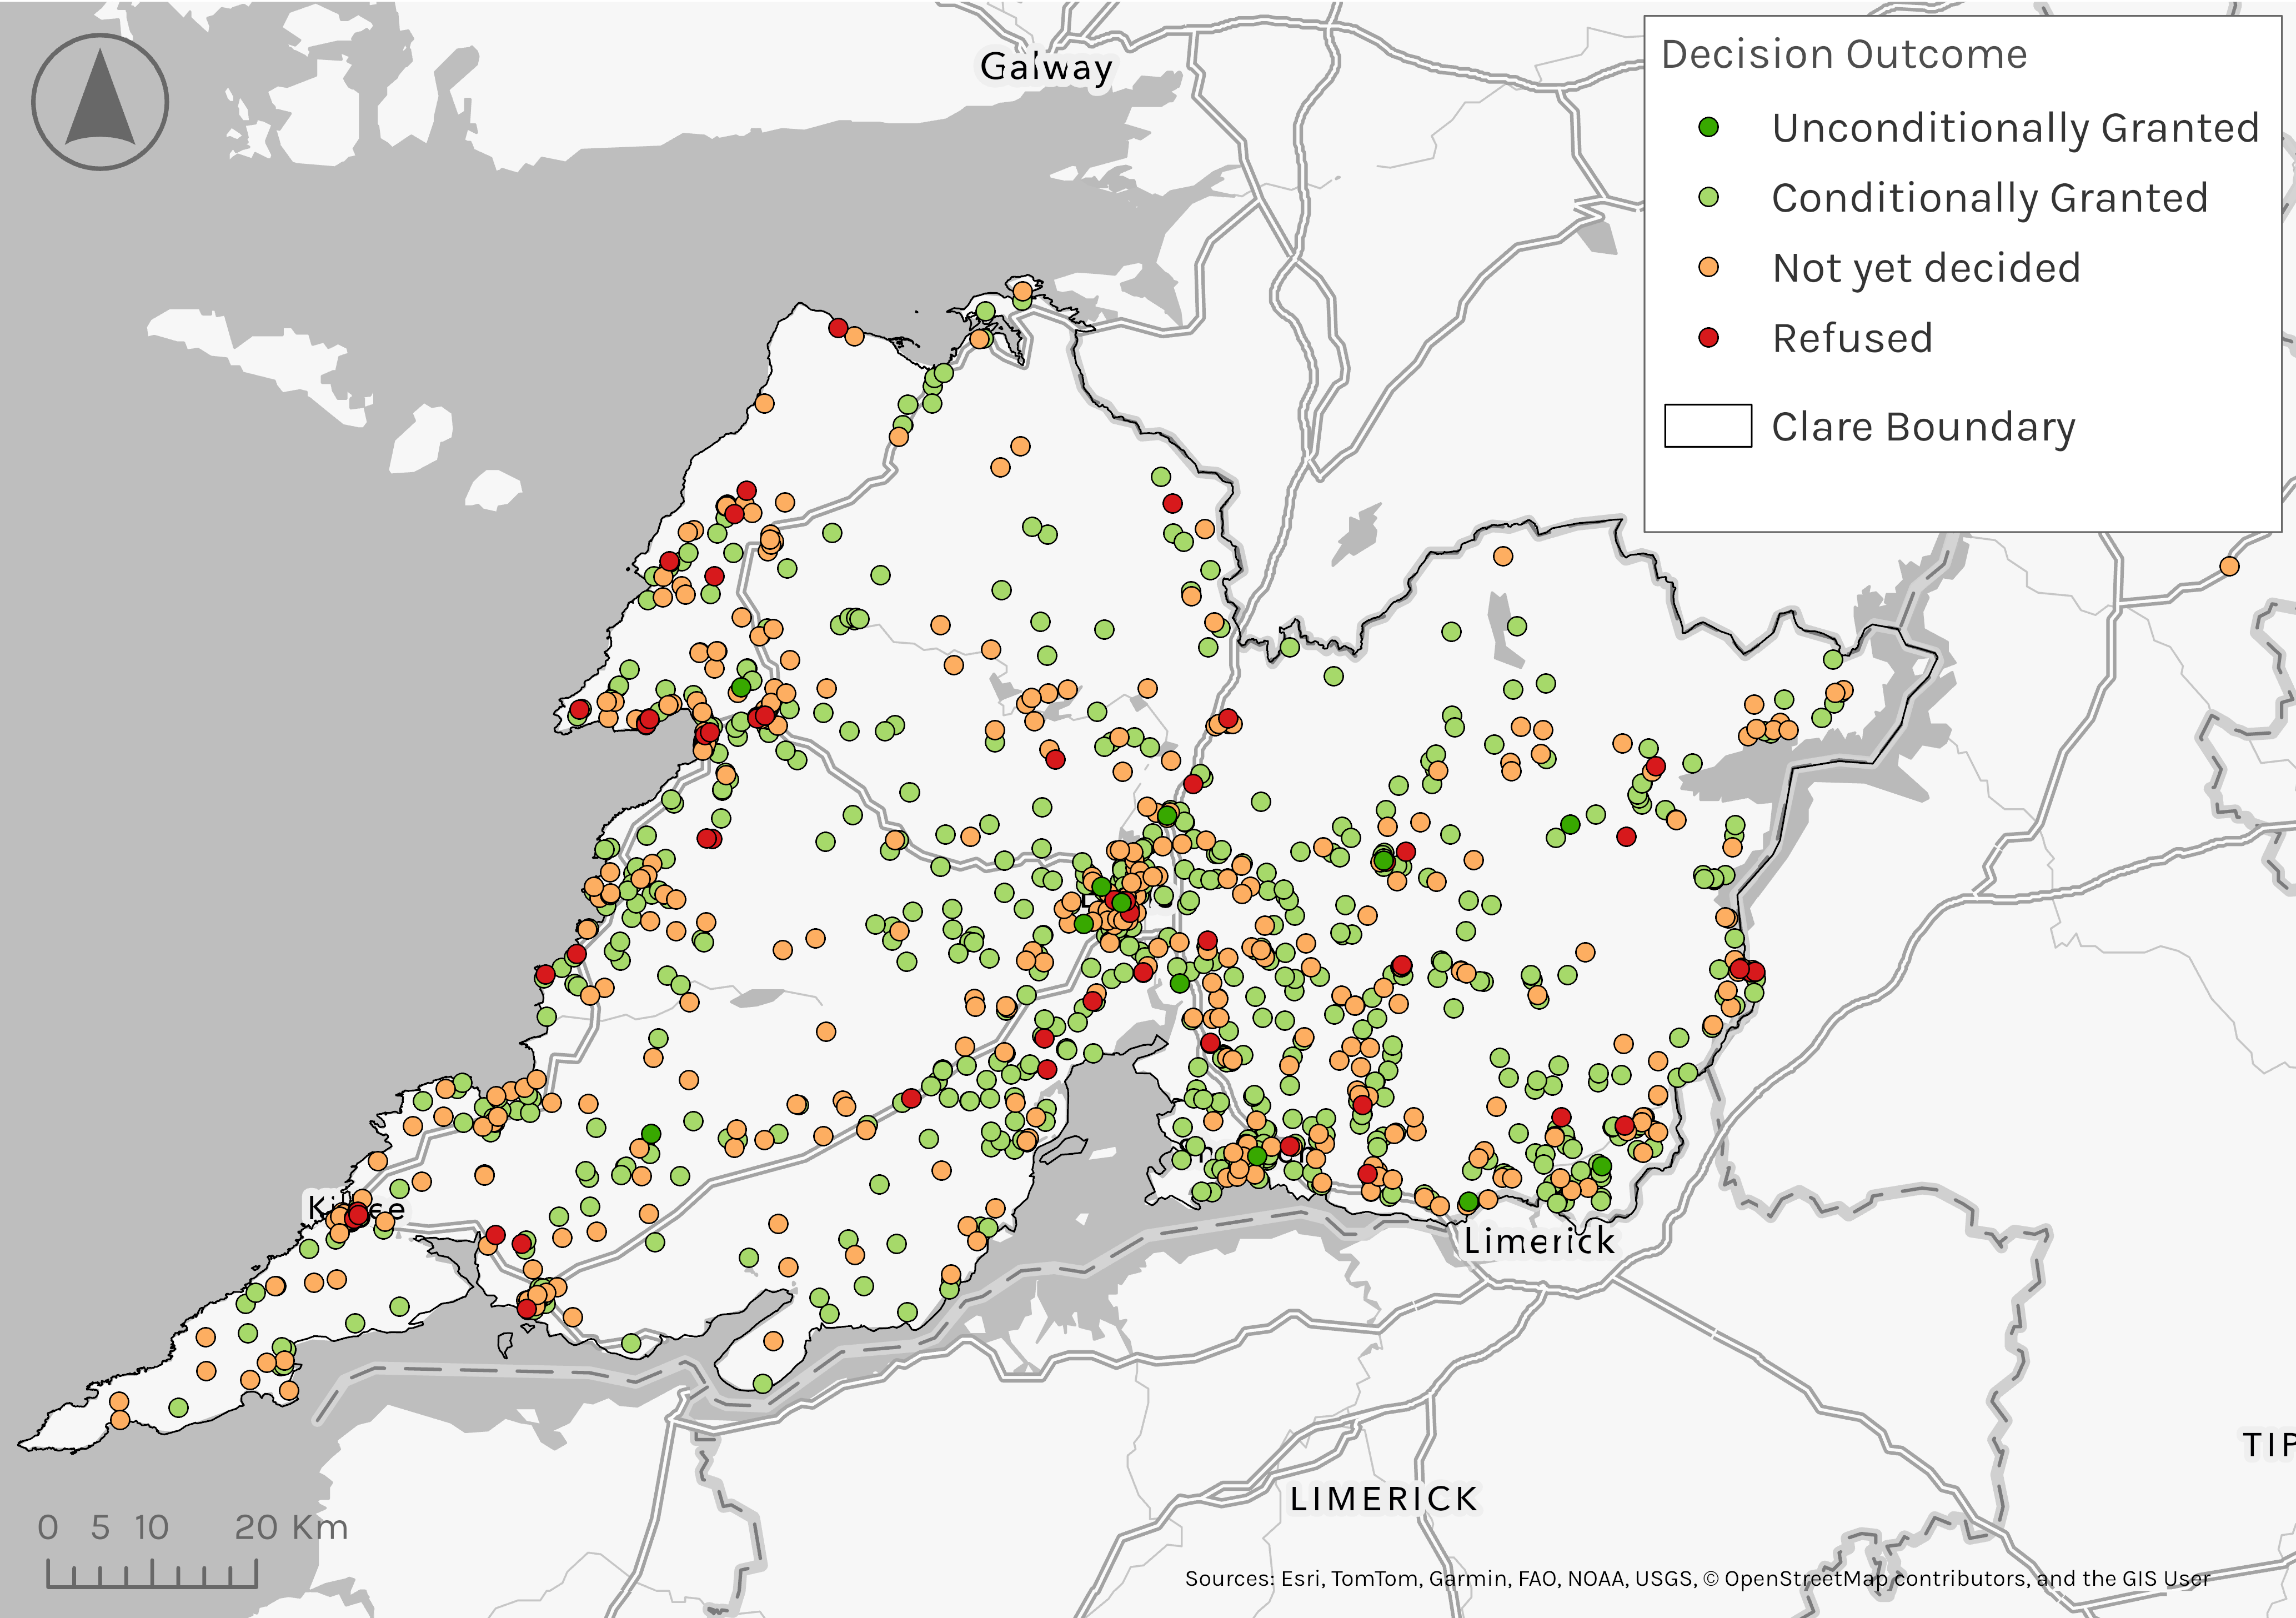

--------------------------------------------------

## Residential Units

In [23]:
# The sum of Residential units applied for 
x = sum(df['NumResidentialUnits'])
print (f"The number of residential units applied for in County Clare in 2025 is {x:,}")

The number of residential units applied for in County Clare in 2025 is 1,689


In [24]:
# min max of the Residential Units
min = df['NumResidentialUnits'].min()

max = df['NumResidentialUnits'].max()

print (f"The min residential unit number is {min} and the max residential unit number is {max}")

The min residential unit number is 0 and the max residential unit number is 300


In [25]:
df['ResUnitsGroup'] = df['NumResidentialUnits']

In [26]:
# Source: https://www.geeksforgeeks.org/pandas/ways-to-filter-pandas-dataframe-by-column-values/
# Source: https://tutorialreference.com/python/examples/faq/python-pandas-how-to-select-rows-between-two-values-in-dataframe
# Source: https://stackoverflow.com/questions/18196203/how-to-conditionally-update-dataframe-column-in-pandas

df.loc[df['NumResidentialUnits'].between(1, 11, inclusive="neither"), 'ResUnitsGroup'] = '2-10'
df.loc[df['NumResidentialUnits'].between(10, 101, inclusive="neither"), 'ResUnitsGroup'] = '11-100'
df.loc[df['NumResidentialUnits'].between(100, 301, inclusive="neither"), 'ResUnitsGroup'] = '101-300'

/tmp/ipykernel_162782/2201929109.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2-10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['NumResidentialUnits'].between(1, 11, inclusive="neither"), 'ResUnitsGroup'] = '2-10'


In [27]:
df['ResUnitsGroup'] = df['ResUnitsGroup'].astype(str)

In [28]:
# I also need to determine the outcome of the applications that have decisions 
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

resunits = df['ResUnitsGroup'].value_counts()
print("Value counts in ResUnitsGroup:\n",resunits);

Value counts in ResUnitsGroup:
 ResUnitsGroup
1          718
0          423
2-10        19
11-100      11
101-300      2
Name: count, dtype: int64


In [29]:
resunits = resunits.astype(str)
resunits_types = resunits.index
resunits_types

Index(['1', '0', '2-10', '11-100', '101-300'], dtype='object', name='ResUnitsGroup')

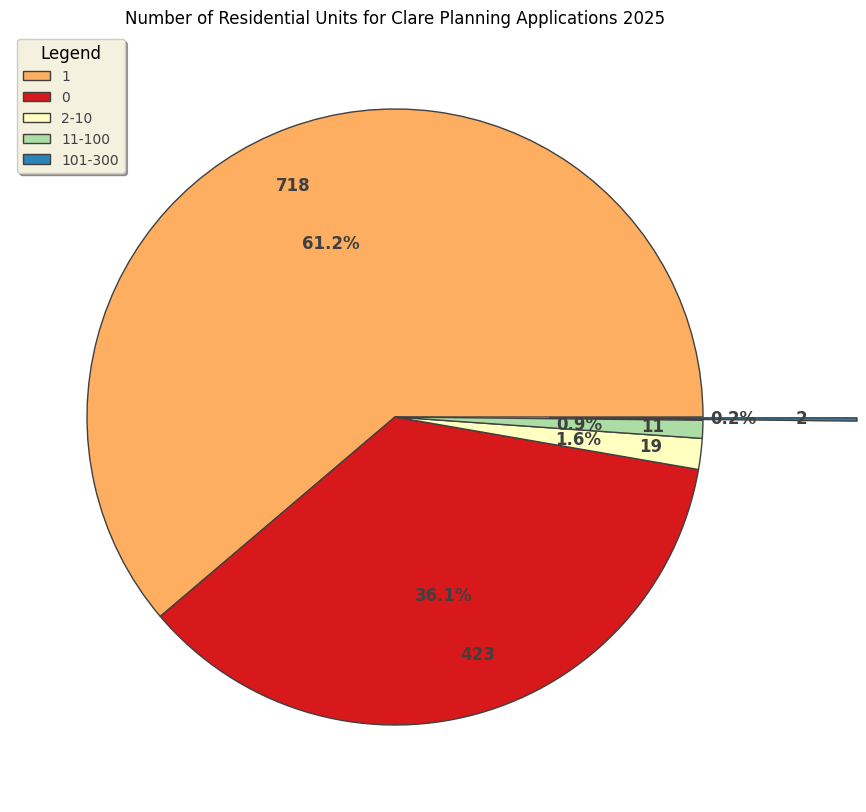

In [30]:
# Source - https://www.geeksforgeeks.org/data-science/plot-a-pie-chart-in-python-using-matplotlib/
# Source -  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure (figsize = (10,10))

# The below source was incredibly useful to help me to figure out plot label sizing
# Source - https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart

# Source for label positioning - https://proclusacademy.com/blog/customize_matplotlib_piechart/
# Source for edgecolour - https://colab.research.google.com/github/Vikasdonta1/Data-Visualization-using-Matplotlib-Course/blob/main/Matplotlib_Plot_a_Pie_Chart.ipynb#scrollTo=4pKiYTKx6bgP

plt.pie(resunits, labels = resunits, labeldistance = 0.8, explode = (0,0,0,0,0.5), wedgeprops={'edgecolor': '#404040'}, textprops={'fontsize': 12, 'color' : '#404040', 'weight':'bold'}, autopct='%1.1f%%', pctdistance = 0.6, colors =['#fdae61', '#d7191c','#ffffbf', '#abdda4', '#2b83ba'])

plt.title("Number of Residential Units for Clare Planning Applications 2025")

# Source - https://matplotlib.org/stable/api/legend_api.html
legend = plt.legend(resunits_types, labelcolor = "#404040", shadow = True, loc = "upper left", title = 'Legend', facecolor='#f4f1de', fontsize = 'medium', title_fontsize = 'large')
# Source - https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html
legend.get_title().set_color("#000000")

plt.show()

The number of Residential Units by group in Clare Planning Applications 2025

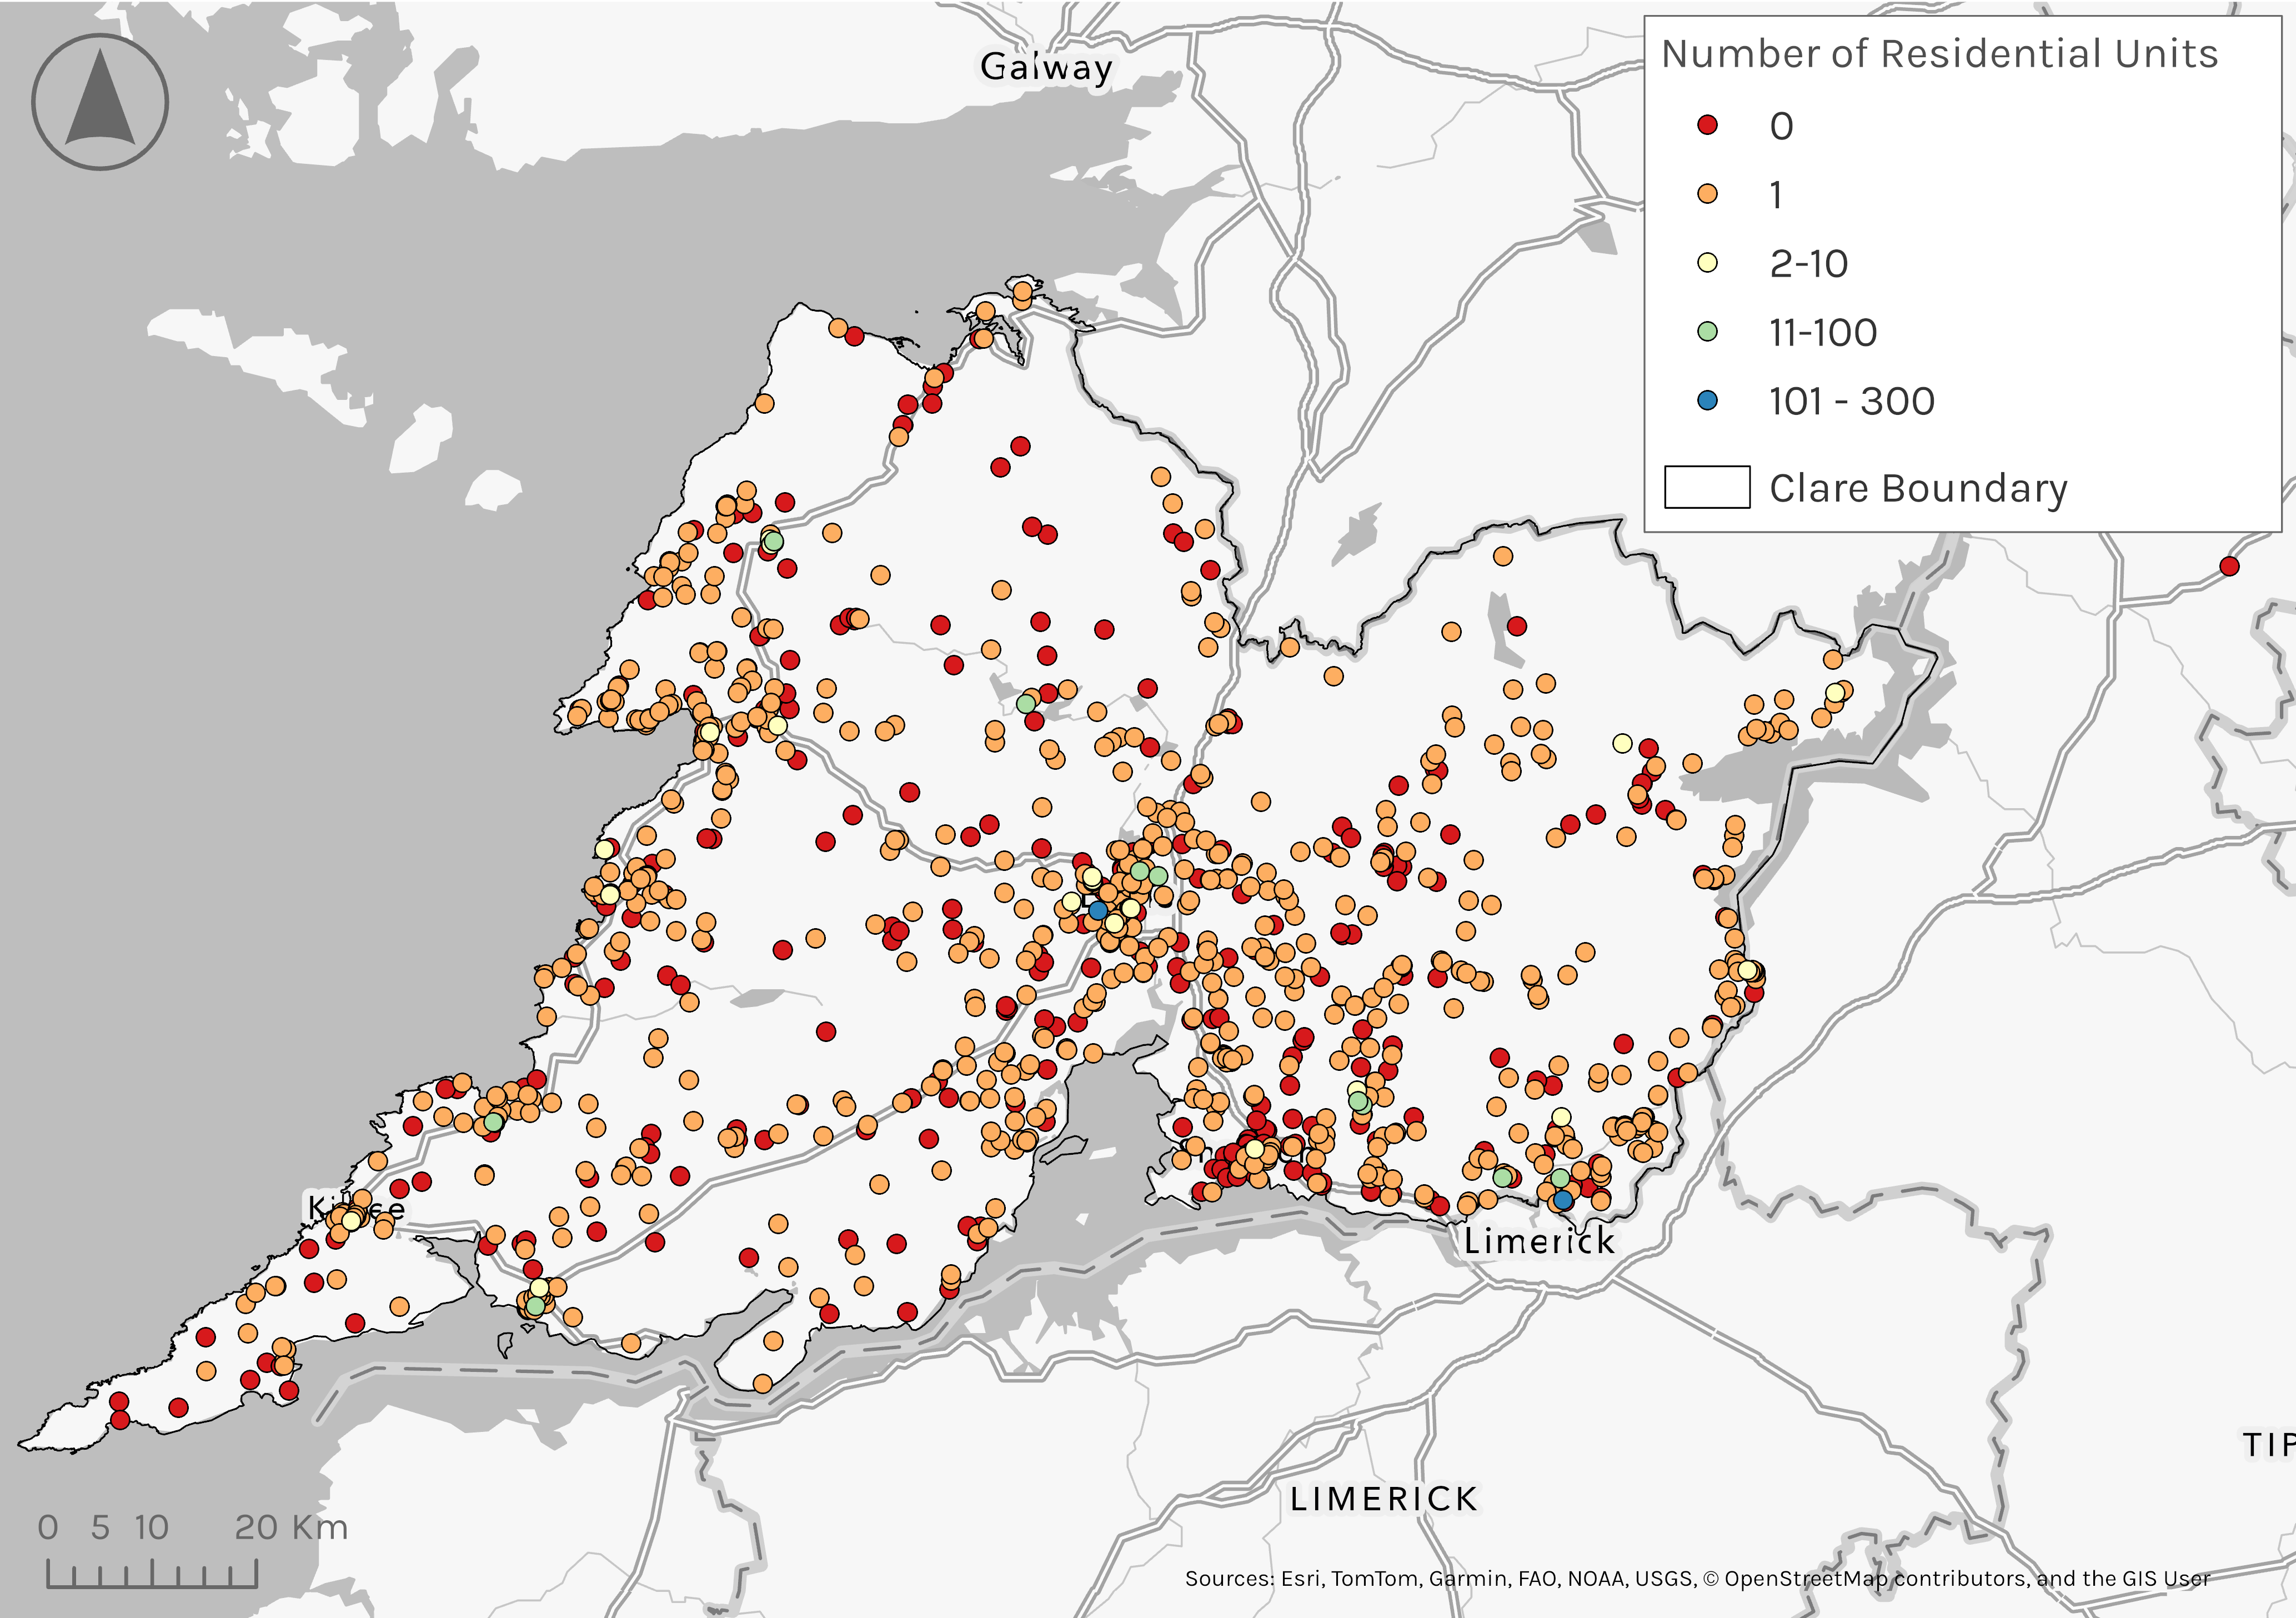

In [31]:
df['DecisionDateDiff'] = (df['DecisionDueDate'] - df['DecisionDate'])

In [42]:
# Source: https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
df['DecisionDateDiff'] = (df['DecisionDueDate'] - df['DecisionDate']).dt.days
df['DecisionDateDiff']

0       0.0
1       2.0
2       4.0
3       0.0
4       1.0
       ... 
1168    NaN
1169    NaN
1170    NaN
1171    NaN
1172    NaN
Name: DecisionDateDiff, Length: 1173, dtype: float64

In [48]:
decision_date = df['DecisionDateDiff'].mean()
print (f"On average, the planning decision arrives {decision_date:.1f} after the due date.")

On average, the planning decision arrives 4.2 after the due date.


----------------------------------

### The End